# Statistical Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./noGUI/results/combined_results_2021-05-19T21-30-03.csv")
# pd.set_option('display.max_rows', df.shape[0]+1)


In [3]:
df

,sim_number,start_pos,start_angle,nbRefPointBots,nbMeasurerBots,globalMethodRPB,mb_exp_method,rpb_exp_method,rpb_sel_method,first_loop,measuredTiles,surface,pathLength,sim_duration,totalPathLengthRPB,nbMovesRPB,averageMoveLengthRPB,maxLengthMoveRPB,roomName
0,1,"(666, 694)",0.0,6,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,89,175,103,16.676001,65.006253,9,7.222917,15.368484,../../../UWBSLAM22-18.pickle
1,2,"(666, 694)",0.0,7,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,90,175,140,29.548967,112.818579,12,9.401548,26.475392,../../../UWBSLAM22-18.pickle
2,3,"(666, 694)",0.0,8,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,130,175,211,36.206837,131.871682,14,9.419406,21.084198,../../../UWBSLAM22-18.pickle
3,4,"(666, 694)",0.0,9,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,130,175,209,57.031032,172.135790,17,10.125635,26.420915,../../../UWBSLAM22-18.pickle
4,5,"(666, 694)",0.0,10,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,164,175,267,130.729403,254.968216,25,10.198729,22.551723,../../../UWBSLAM22-18.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,31,"(1166, 144)",0.0,6,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,147,175,180,11.558998,161.338777,18,8.963265,21.160000,../../../UWBSLAM22-18.pickle
136,32,"(1166, 144)",0.0,7,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,147,175,184,16.049996,237.829752,28,8.493920,18.360675,../../../UWBSLAM22-18.pickle
137,33,"(1166, 144)",0.0,8,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,147,175,177,17.046997,260.669047,29,8.988588,21.160000,../../../UWBSLAM22-18.pickle
138,34,"(1166, 144)",0.0,9,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,147,175,181,26.539999,309.583861,36,8.599552,17.360675,../../../UWBSLAM22-18.pickle


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sim_number            30 non-null     int64  
 1   start_pos             30 non-null     object 
 2   start_angle           30 non-null     float64
 3   nbRefPointBots        30 non-null     int64  
 4   nbMeasurerBots        30 non-null     int64  
 5   mb_exp_method         30 non-null     object 
 6   rpb_exp_method        30 non-null     object 
 7   rpb_sel_method        30 non-null     object 
 8   first_loop            30 non-null     object 
 9   measuredTiles         30 non-null     int64  
 10  surface               30 non-null     int64  
 11  pathLength            30 non-null     int64  
 12  sim_duration          30 non-null     float64
 13  totalPathLengthRPB    30 non-null     float64
 14  nbMovesRPB            30 non-null     int64  
 15  averageMoveLengthRPB  30 

In [4]:
progSeries = df[(df["globalMethodRPB"] == "progressive") & (df["rpb_sel_method"] == "findFurthestBotDjikstra")]
resetSeries = df[(df["globalMethodRPB"] == "reset") & (df["rpb_sel_method"] == "findLeastUsefulBotsDjikstra")]

In [45]:
nbRefPointBots = []
progMeasuredTiles = []
resetMeasuredTiles = []
progTotalPathLengthRPB = [] 
resetTotalPathLengthRPB = []
for i in progSeries["nbRefPointBots"].unique():
    nbRefPointBots.append(i)
    progMeasuredTiles.append(progSeries[progSeries["nbRefPointBots"] == i]["measuredTiles"].mean())
    resetMeasuredTiles.append(resetSeries[resetSeries["nbRefPointBots"] == i]["measuredTiles"].mean())
    progTotalPathLengthRPB.append(progSeries[progSeries["nbRefPointBots"] == i]["totalPathLengthRPB"].mean())
    resetTotalPathLengthRPB.append(resetSeries[resetSeries["nbRefPointBots"] == i]["totalPathLengthRPB"].mean())


In [8]:
progSeries["nbRefPointBots"].unique()


array([ 6,  7,  8,  9, 10,  6,  7,  8,  9, 10,  6,  7,  8,  9, 10,  6,  7,
        8,  9, 10,  6,  7,  8,  9, 10,  6,  7,  8,  9, 10,  6,  7,  8,  9,
       10], dtype=int64)

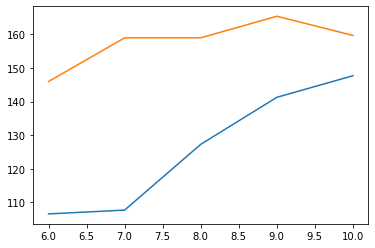

In [46]:
plt.plot(nbRefPointBots, progMeasuredTiles)
plt.plot(nbRefPointBots, resetMeasuredTiles)
plt.show()

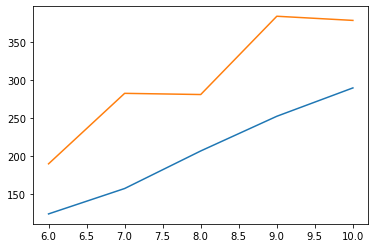

In [47]:
plt.plot(nbRefPointBots, progTotalPathLengthRPB)
plt.plot(nbRefPointBots, resetTotalPathLengthRPB)
plt.show()